In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectPercentile,chi2,f_classif
from sklearn.metrics import confusion_matrix , classification_report


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("matches.csv")
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [3]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [6]:
dff=df.drop(columns=['notes','date','Unnamed: 0'])


In [7]:
dff.drop_duplicates()

,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,Anthony Taylor,Match Report,12,3,16.9,1,0,0,2020,Norwich City
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,Kevin Friend,Match Report,11,2,19.8,1,0,0,2020,Norwich City
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,Jonathan Moss,Match Report,2,0,20.6,0,0,0,2020,Norwich City
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,Kevin Friend,Match Report,6,2,13.4,0,0,0,2020,Norwich City


In [8]:
dff['XGD']=dff['xg']-dff['xga']

In [9]:
dff['Weekend'] = dff['day'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)

dff


,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,sh,sot,dist,fk,pk,pkatt,season,team,XGD,Weekend
0,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,13,8,21.1,2,1,1,2024,Manchester City,1.3,0
1,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,16,5,19.8,1,0,0,2024,Manchester City,-2.0,1
2,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,23,1,18.2,1,0,0,2024,Manchester City,-1.2,1
3,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,13,5,17.7,0,0,0,2024,Manchester City,0.4,1
4,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,14,7,20.9,1,0,0,2024,Manchester City,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,12,3,16.9,1,0,0,2020,Norwich City,0.0,0
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,11,2,19.8,1,0,0,2020,Norwich City,-2.9,1
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,2,0,20.6,0,0,0,2020,Norwich City,-2.4,0
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,6,2,13.4,0,0,0,2020,Norwich City,-1.5,1


In [10]:
dff['+/-']=dff['gf']-dff['ga']

In [11]:

dff['day'].value_counts()

Sat    2055
Sun    1355
Wed     426
Mon     315
Tue     280
Thu     198
Fri     159
Name: day, dtype: int64

In [12]:
dff['opponent'].value_counts()

Crystal Palace     240
Wolves             240
Brighton           240
West Ham           240
Newcastle Utd      240
Aston Villa        240
Arsenal            240
Everton            240
Tottenham          238
Liverpool          238
Manchester City    238
Chelsea            238
Manchester Utd     238
Burnley            202
Southampton        202
Leicester City     200
Sheffield Utd      164
Fulham             152
Leeds United       152
Bournemouth        126
Brentford          114
Norwich City        88
Watford             88
West Brom           76
Nott'ham Forest     76
Luton Town          38
Name: opponent, dtype: int64

In [13]:
dff['team'].value_counts()

Manchester United           266
Chelsea                     266
Manchester City             266
Tottenham Hotspur           266
Liverpool                   266
Everton                     228
Aston Villa                 228
Newcastle United            228
West Ham United             228
Arsenal                     228
Brighton and Hove Albion    228
Leicester City              228
Wolverhampton Wanderers     228
Crystal Palace              228
Burnley                     190
Southampton                 190
Sheffield United            152
Fulham                      152
Leeds United                152
Brentford                   114
Bournemouth                 114
Nottingham Forest            76
Norwich City                 76
West Bromwich Albion         76
Watford                      76
Luton Town                   38
Name: team, dtype: int64

In [14]:
dff['venue'].value_counts()

Home    2394
Away    2394
Name: venue, dtype: int64

In [15]:
total_attendaance_for_season=dff.groupby("season")['attendance']
total_attendaance_for_season.sum()

season
2020    22644992.0
2021      351184.0
2022    30052958.0
2023    38397950.0
2024    29697302.0
Name: attendance, dtype: float64

In [16]:
attendance_sum_by_season = df.groupby('season')['attendance'].sum().reset_index()
attendance_sum_by_season

,season,attendance
0,2020,22644992.0
1,2021,351184.0
2,2022,30052958.0
3,2023,38397950.0
4,2024,29697302.0


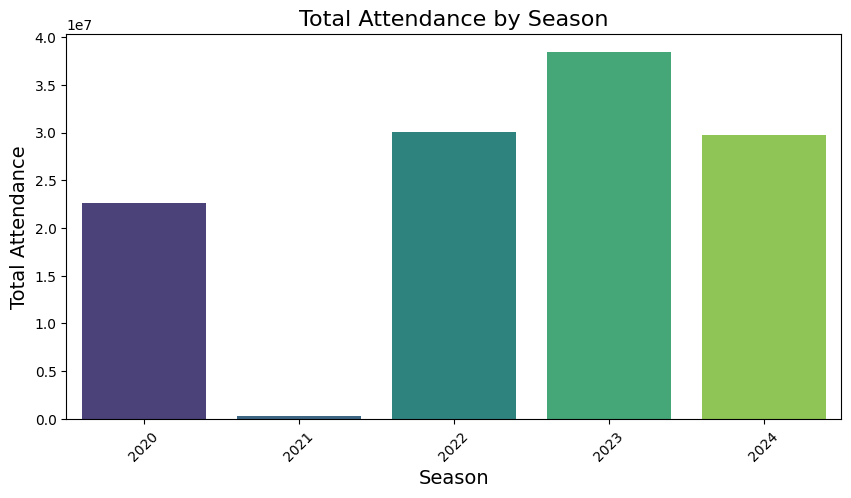

In [17]:
plt.figure(figsize=(10, 5))

# Use barplot to show the sum of attendance by season
sns.barplot(x='season', y='attendance', data=attendance_sum_by_season, palette="viridis")

plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Attendance by Season', fontsize=16)

plt.xticks(rotation=45)
plt.show()


In [18]:
goals_for_the_home_team=dff.groupby('team')['gf'].sum().reset_index()
goals_for_the_home_team

,team,gf
0,Arsenal,406
1,Aston Villa,330
2,Bournemouth,131
3,Brentford,162
4,Brighton and Hove Albion,288
5,Burnley,184
6,Chelsea,445
7,Crystal Palace,260
8,Everton,255
9,Fulham,164


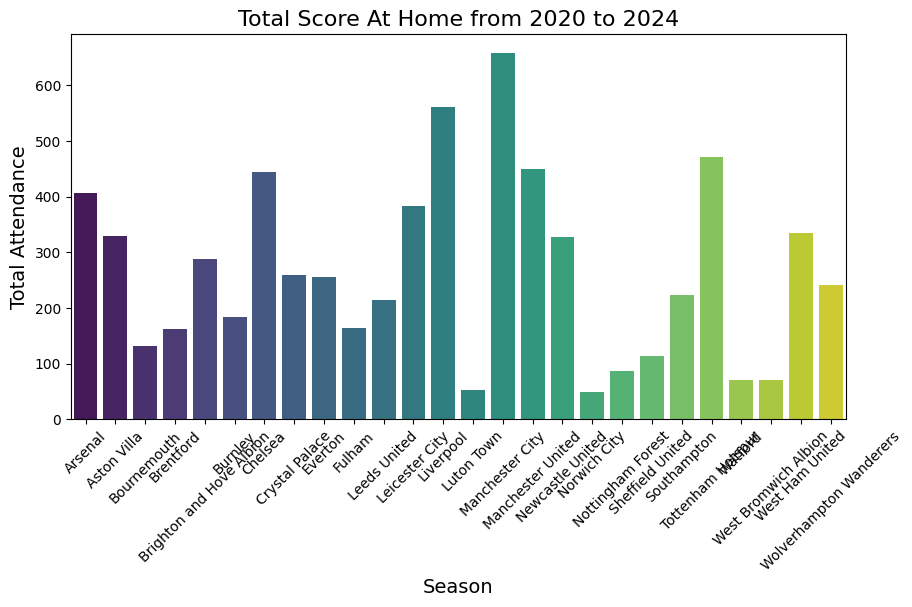

In [19]:
plt.figure(figsize=(10, 5))

# Use barplot to show the sum of attendance by season
sns.barplot(x='team', y='gf', data=goals_for_the_home_team, palette="viridis")

plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Score At Home from 2020 to 2024', fontsize=16)

plt.xticks(rotation=45)
plt.show()

In [20]:
goals_for_the_Away_team=dff.groupby('team')['ga'].sum().reset_index()
goals_for_the_Away_team

,team,ga
0,Arsenal,246
1,Aston Villa,320
2,Bournemouth,203
3,Brentford,167
4,Brighton and Hove Albion,305
5,Burnley,291
6,Chelsea,323
7,Crystal Palace,335
8,Everton,326
9,Fulham,220


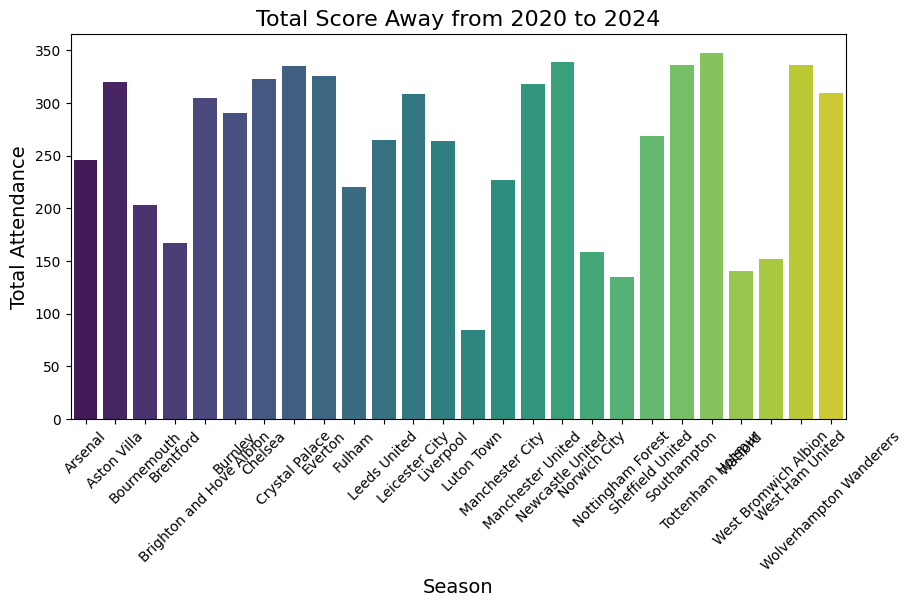

In [21]:
plt.figure(figsize=(10, 5))

# Use barplot to show the sum of attendance by season
sns.barplot(x='team', y='ga', data=goals_for_the_Away_team, palette="viridis")

plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Score Away from 2020 to 2024', fontsize=16)

plt.xticks(rotation=45)
plt.show()

In [22]:
max_goals_for_the_Away_team = goals_for_the_Away_team[goals_for_the_Away_team['ga'] == goals_for_the_Away_team['ga'].max()]

# Extract the team and the goals against
team_with_max_goals_away = max_goals_for_the_Away_team['team'].values[0]
max_goals_away = max_goals_for_the_Away_team['ga'].values[0]

print(f"The team that conceded the most goals away is {team_with_max_goals_away} with {max_goals_away} goals.")

The team that conceded the most goals away is Tottenham Hotspur with 348 goals.


In [23]:
max_goals_for_the_home_team = goals_for_the_home_team[goals_for_the_home_team['gf'] == goals_for_the_home_team['gf'].max()]

# Extract the team and the goals against
team_with_max_goals_away = max_goals_for_the_home_team['team'].values[0]
max_goals_away = max_goals_for_the_home_team['gf'].values[0]

print(f"The team that conceded the most goals away is {team_with_max_goals_away} with {max_goals_away} goals.")

The team that conceded the most goals away is Manchester City with 659 goals.


In [24]:
team_results = df.groupby('team')['result'].value_counts().unstack()
team_results

result,D,L,W
team,,,
Arsenal,42,60,126
Aston Villa,43,93,92
Bournemouth,22,59,33
Brentford,30,46,38
Brighton and Hove Albion,77,82,69
Burnley,50,93,47
Chelsea,63,75,128
Crystal Palace,63,95,70
Everton,53,96,79


In [25]:
max_wins = team_results['W'].max()
max_losses = team_results['L'].max()
max_draws = team_results['D'].max()

teams_with_max_wins = team_results[team_results['W'] == max_wins]
teams_with_max_losses = team_results[team_results['L'] == max_losses]
teams_with_max_draws = team_results[team_results['D'] == max_draws]

print(f"Teams with the maximum number of wins ({max_wins}):")
print(teams_with_max_wins)

print(f"\nTeams with the maximum number of losses ({max_losses}):")
print(teams_with_max_losses)

print(f"\nTeams with the maximum number of draws ({max_draws}):")
print(teams_with_max_draws)

Teams with the maximum number of wins (191):
result            D   L    W
team                        
Manchester City  34  41  191

Teams with the maximum number of losses (98):
result             D   L   W
team                        
Sheffield United  23  98  31

Teams with the maximum number of draws (77):
result                     D   L   W
team                                
Brighton and Hove Albion  77  82  69


In [26]:
attendance_sum_by_season = df.groupby('season')['attendance'].sum().reset_index()
attendance_sum_by_season

,season,attendance
0,2020,22644992.0
1,2021,351184.0
2,2022,30052958.0
3,2023,38397950.0
4,2024,29697302.0


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
# Assume dff has a column named 'day' that you want to convert to integers


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'day' column
dff['day_encoded'] = label_encoder.fit_transform(dff['day'])

# Display the DataFrame
dff.columns

Index(['time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
       'season', 'team', 'XGD', 'Weekend', '+/-', 'day_encoded'],
      dtype='object')

In [28]:
ddf=pd.get_dummies(dff,columns=['venue'])
ddf


,time,comp,round,day,result,gf,ga,opponent,xg,xga,...,pk,pkatt,season,team,XGD,Weekend,+/-,day_encoded,venue_Away,venue_Home
0,20:15 (21:15),Premier League,Matchweek 2,Mon,W,3,1,Wolves,1.9,0.6,...,1,1,2024,Manchester City,1.3,0,2,1,1,0
1,16:30 (17:30),Premier League,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.9,...,0,0,2024,Manchester City,-2.0,1,-3,3,0,1
2,17:30 (18:30),Premier League,Matchweek 4,Sat,D,1,1,Leeds United,1.2,2.4,...,0,0,2024,Manchester City,-1.2,1,0,2,1,0
3,17:30 (18:30),Premier League,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.9,...,0,0,2024,Manchester City,0.4,1,1,2,0,1
4,12:30 (13:30),Premier League,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.3,...,0,0,2024,Manchester City,0.7,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,L,1,2,Watford,1.2,1.2,...,0,0,2020,Norwich City,0.0,0,-1,5,1,0
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,L,0,4,West Ham,0.6,3.5,...,0,0,2020,Norwich City,-2.9,1,-4,2,0,1
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,L,0,1,Chelsea,0.1,2.5,...,0,0,2020,Norwich City,-2.4,0,-1,5,1,0
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,L,0,2,Burnley,0.3,1.8,...,0,0,2020,Norwich City,-1.5,1,-2,2,0,1


In [58]:
goals_for_season=ddf[['team','season','+/-']]
sum_goals_for_season=goals_for_season.groupby(['team','season'],as_index=False).sum()
sum_goals_for_season

,team,season,+/-
0,Arsenal,2020,8
1,Arsenal,2021,16
2,Arsenal,2022,13
3,Arsenal,2023,45
4,Arsenal,2024,78
...,...,...,...
99,Wolverhampton Wanderers,2020,11
100,Wolverhampton Wanderers,2021,-16
101,Wolverhampton Wanderers,2022,-5
102,Wolverhampton Wanderers,2023,-27


In [60]:
grouped_pivot = sum_goals_for_season.pivot(index='season',columns='team')
grouped_pivot

+/-                                                             \
team   Arsenal Aston Villa Bournemouth Brentford Brighton and Hove Albion   
season                                                                      
2020       8.0       -26.0       -25.0       NaN                    -15.0   
2021      16.0         9.0         NaN       NaN                     -6.0   
2022      13.0        -2.0         NaN      -8.0                     -2.0   
2023      45.0         5.0       -34.0      12.0                     19.0   
2024      78.0        24.0       -13.0      -9.0                    -13.0   

                                                      ...                   \
team   Burnley Chelsea Crystal Palace Everton Fulham  ... Newcastle United   
season                                                ...                    
2020      -7.0    15.0          -19.0   -12.0    NaN  ...            -20.0   
2021     -22.0    22.0          -25.0    -1.0  -26.0  ...            -16.0   
2022     -19.0    43.0            4.0   -23.0    NaN  ...            -18.0   
2023       NaN     6.0           -9.0   -23.0    2.0  ...             35.0   
2024     -59.0    36.0          -26.0   -12.0  -32.0  ...              7.0   

                                                                    \
team   Norwich City Nottingham Forest Sheffield United Southampton   
season                                                               
2020          -49.0               NaN              0.0        -9.0   
2021            NaN               NaN            -43.0       -21.0   
2022          -61.0               NaN              NaN       -24.0   
2023            NaN             -30.0              NaN       -37.0   
2024            NaN             -18.0           -112.0       -21.0   

                                                                       \
team   Tottenham Hotspur Watford West Bromwich Albion West Ham United   
season                                                                  
2020                14.0   -28.0                  NaN           -13.0   
2021                23.0     NaN                -41.0            15.0   
2022                29.0   -43.0                  NaN             9.0   
2023                21.0     NaN                  NaN           -13.0   
2024                36.0     NaN                -41.0             1.0   

                                
team   Wolverhampton Wanderers  
season                          
2020                      11.0  
2021                     -16.0  
2022                      -5.0  
2023                     -27.0  
2024                     -31.0  

[5 rows x 26 columns]

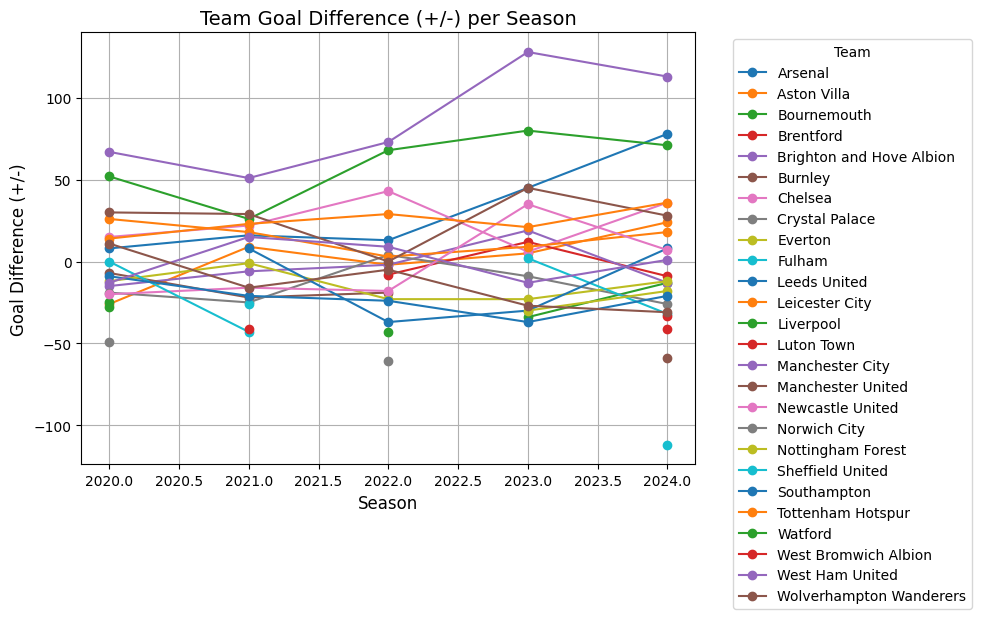

In [63]:

# Plotting the grouped pivot table

# Plot each team's goal difference (+/-) over the seasons
grouped_pivot.plot(figsize=(10, 6), marker='o')

# Adding labels and title
plt.title('Team Goal Difference (+/-) per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Goal Difference (+/-)', fontsize=12)

# Displaying the plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

ddf['team_encoded'] = label_encoder.fit_transform(ddf['team'])


In [30]:


# Apply LabelEncoder to the 'day' column
ddf['opponent_encoded'] = label_encoder.fit_transform(ddf['opponent'])


In [31]:

ddf['result_encoded'] = label_encoder.fit_transform(ddf['result'])
ddf['result_encoded'].value_counts()

2    1895
1    1820
0    1073
Name: result_encoded, dtype: int64

In [32]:
ddf['formation_encoded'] = label_encoder.fit_transform(ddf['formation'])


In [33]:
data_clean=ddf.dropna()


In [34]:
data_clean.columns

Index(['time', 'comp', 'round', 'day', 'result', 'gf', 'ga', 'opponent', 'xg',
       'xga', 'poss', 'attendance', 'captain', 'formation', 'referee',
       'match report', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season',
       'team', 'XGD', 'Weekend', '+/-', 'day_encoded', 'venue_Away',
       'venue_Home', 'team_encoded', 'opponent_encoded', 'result_encoded',
       'formation_encoded'],
      dtype='object')

In [35]:
x=data_clean[[ 'gf', 'ga', 'xg','xga', 'poss', 'sh',  'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'XGD', 'Weekend',
       '+/-', 'day_encoded', 'venue_Away', 'venue_Home', 'team_encoded','attendance','opponent_encoded']]
y=data_clean['result_encoded']

In [36]:
function_selection=SelectPercentile(score_func=f_classif,percentile=80)
x_selection=function_selection.fit_transform(x,y)
pd.DataFrame(x_selection,columns=[i for i,j in zip(x,function_selection.get_support())if j])

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,XGD,+/-,venue_Away,venue_Home,team_encoded
0,2.0,3.0,0.9,1.1,37.0,8.0,4.0,14.2,1.0,0.0,0.0,-0.2,-1.0,1.0,0.0,14.0
1,5.0,0.0,2.5,1.1,67.0,21.0,11.0,15.6,0.0,0.0,0.0,1.4,5.0,0.0,1.0,14.0
2,3.0,1.0,1.7,2.0,60.0,15.0,6.0,19.3,0.0,0.0,0.0,-0.3,2.0,1.0,0.0,15.0
3,1.0,1.0,0.9,0.9,57.0,13.0,6.0,21.7,2.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
4,2.0,1.0,2.0,0.9,43.0,8.0,3.0,18.6,0.0,1.0,1.0,1.1,1.0,1.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,0.0,0.0,2.2,1.0,56.0,19.0,4.0,16.4,0.0,0.0,0.0,1.2,0.0,1.0,0.0,17.0
3151,0.0,1.0,0.3,2.0,37.0,5.0,1.0,16.5,0.0,0.0,0.0,-1.7,-1.0,0.0,1.0,17.0
3152,0.0,3.0,0.4,2.9,60.0,6.0,4.0,16.8,0.0,0.0,0.0,-2.5,-3.0,1.0,0.0,17.0
3153,1.0,0.0,0.6,1.3,43.0,11.0,6.0,19.1,2.0,0.0,0.0,-0.7,1.0,0.0,1.0,17.0


In [37]:
function_selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False, False])

In [38]:
data_clean.corr()['result_encoded']



gf                   0.486721
ga                  -0.280689
xg                   0.319489
xga                 -0.214600
poss                 0.103603
attendance           0.041131
sh                   0.177287
sot                  0.308313
dist                -0.082504
fk                   0.049134
pk                   0.123622
pkatt                0.120715
season               0.027536
XGD                  0.332349
Weekend             -0.016319
+/-                  0.498773
day_encoded          0.037155
venue_Away          -0.094784
venue_Home           0.094784
team_encoded        -0.013138
opponent_encoded     0.039275
result_encoded       1.000000
formation_encoded    0.005718
Name: result_encoded, dtype: float64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2208, 21) (2208,)
Test set: (947, 21) (947,)


In [42]:
dt = DecisionTreeClassifier()

# Define the hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

In [43]:

from sklearn.model_selection import GridSearchCV
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [44]:
dt = DecisionTreeClassifier ( max_depth=None, criterion='gini',min_samples_split= 2, min_samples_leaf= 1,max_features= None)

In [45]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
yhat=dt.predict(x_test)
yhat

array([1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1,
       2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2,
       2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2,

In [47]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dt.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [48]:
class_r=classification_report(y_test,yhat)
print(class_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       340
           2       1.00      1.00      1.00       377

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947



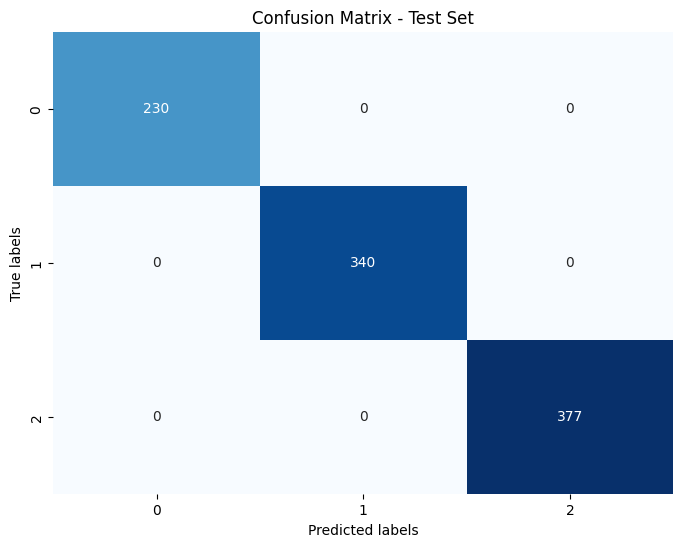

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, yhat)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()